In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import date
from datetime import datetime

%matplotlib inline

In [2]:
headway = pd.read_csv('../data/Headway Data.csv')
bna_2022 = pd.read_csv('../data/bna_2022.csv')
bna_weather = pd.read_csv('../data/bna_weather.csv')

In [3]:
pd.set_option('display.max_columns', None) ##untruncates df
##pd.reset_option(“max_columns”) this resets back to default
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [4]:
headway.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MCC4_20,2.0,2,36.167091,-86.781923,15:30:00,15:26:05,15:27:46,2.233333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [5]:
headway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [6]:
headway.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
count,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981674e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.927285e+06,1.549421e+06,1.507891e+06,1.507347e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.981715e+06,1.579068e+06,1.981715e+06,1.981715e+06,1.927259e+06
mean,1.202191e+08,1.301276e+00,8.440206e+07,3.933449e+01,3.947508e+03,1.635251e+03,3.111437e+05,9.984281e-03,7.122218e+00,5.848394e-01,3.616027e+01,-8.676758e+01,-2.193849e+00,1.864981e+01,1.898972e+01,3.647395e-01,2.738487e-02,1.057655e-01,8.393836e-01,2.552234e-02,2.351577e-02,1.275310e-02,3.254840e+02,2.856618e+00
std,3.423559e+03,6.398457e-01,4.330643e+06,1.969928e+01,1.973956e+03,6.375643e+02,7.312918e+03,1.291578e-01,3.828157e+00,7.959966e-01,5.936899e-02,6.353687e-02,4.886912e+00,1.217166e+01,1.395040e+01,6.579797e+00,1.632022e-01,3.075373e-01,3.671769e-01,1.577053e-01,1.515348e-01,1.122072e-01,2.353626e+02,5.986122e+00
min,1.202111e+08,1.000000e+00,7.644716e+07,3.000000e+00,3.000000e+02,0.000000e+00,2.977490e+05,0.000000e+00,1.000000e+00,0.000000e+00,3.604893e+01,-8.695566e+01,-5.067667e+02,0.000000e+00,0.000000e+00,-2.220667e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-1.135833e+02
25%,1.202202e+08,1.000000e+00,8.075122e+07,2.300000e+01,2.301000e+03,1.222000e+03,3.047570e+05,0.000000e+00,4.000000e+00,0.000000e+00,3.612717e+01,-8.680461e+01,-3.400000e+00,1.000000e+01,1.101667e+01,-1.883334e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.380000e+02,0.000000e+00
50%,1.202205e+08,1.000000e+00,8.470092e+07,5.200000e+01,5.200000e+03,1.733000e+03,3.097210e+05,0.000000e+00,6.000000e+00,0.000000e+00,3.615404e+01,-8.677432e+01,-1.383333e+00,1.500000e+01,1.618333e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+02,0.000000e+00
75%,1.202208e+08,1.000000e+00,8.828194e+07,5.500000e+01,5.506000e+03,2.161000e+03,3.174720e+05,0.000000e+00,1.000000e+01,1.000000e+00,3.617975e+01,-8.671410e+01,-1.333330e-01,2.000000e+01,2.306667e+01,1.966666e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.610000e+02,2.183333e+00
max,1.202211e+08,3.000000e+00,9.109076e+07,5.600000e+01,9.975000e+03,2.255400e+04,3.300110e+05,6.000000e+00,1.700000e+01,2.000000e+00,3.630797e+01,-8.663650e+01,7.883333e+01,5.030000e+02,1.084617e+03,1.054617e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.322000e+03,4.271667e+02


In [7]:
headway = headway.drop(headway.columns[[22, 23, 24, 25, 26, 27, 28, 29]], axis=1)
headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN


In [8]:
route55 = headway.loc[headway['ROUTE_ABBR']==55]
route55

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980230,120221101,1,91054163,2022-11-01,55,5594,2041,328691,0,TO DOWNTOWN,MCC4_15,5.0,2,36.167091,-86.781923,07:30:00,07:30:03,07:35:22,-5.366666,NaN,NaN,NaN
1981375,120221101,1,91055687,2022-11-01,55,6401,2029,329206,0,TO DOWNTOWN,ARTS,7.0,1,36.131395,-86.740400,15:12:00,15:05:58,15:11:33,0.450000,NaN,0.35,NaN
1981376,120221101,1,91055688,2022-11-01,55,6401,2029,329206,0,TO DOWNTOWN,MCC4_22,2.0,2,36.167091,-86.781923,15:45:00,15:41:47,15:43:59,1.016666,NaN,NaN,NaN
1981707,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,ARTS,7.0,1,36.131395,-86.740400,15:12:00,14:39:16,15:11:12,0.800000,0.0,NaN,NaN


In [9]:
route55 = route55.loc[route55['DATE'] == '2021-11-01']
route55 = route55.loc[route55['OPERATOR'] == 1716]
route55

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,120211101,1,76452804,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,14:12:00,14:12:50,14:12:50,-0.833333,10.0,11.183333,1.183333
3382,120211101,1,76452805,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,14:20:00,14:21:21,14:21:21,-1.350000,10.0,11.666666,1.666666
3383,120211101,1,76452806,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,14:28:00,14:27:26,14:27:26,0.566666,10.0,11.150000,1.150000
3384,120211101,1,76452807,2021-11-01,55,5500,1716,300298,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,14:40:00,14:40:39,14:40:39,-0.650000,10.0,12.750000,2.750000


In [10]:
route55all = headway.loc[(headway['ROUTE_ABBR']==55) & (headway['DATE'] == '2021-11-01')]
route55all.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN


In [11]:
route55all['HEADWAY_DEV_PERC'] = (route55all['HDWY_DEV']/route55all['SCHEDULED_HDWY'])*100
route55all.head(20)

C:\Users\jamor\AppData\Local\Temp/ipykernel_31552/3858480699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route55all['HEADWAY_DEV_PERC'] = (route55all['HDWY_DEV']/route55all['SCHEDULED_HDWY'])*100


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
3320,120211101,1,76452743,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN,NaN
3321,120211101,1,76452744,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN,NaN
3322,120211101,1,76452745,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,04:35:00,04:35:33,04:35:33,-0.550000,NaN,NaN,NaN,NaN
3323,120211101,1,76452746,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,04:42:00,04:41:54,04:41:54,0.100000,NaN,NaN,NaN,NaN
3324,120211101,1,76452747,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,04:52:00,04:53:10,04:53:10,-1.166666,NaN,NaN,NaN,NaN
3325,120211101,1,76452748,2021-11-01,55,5500,1716,300293,0,TO DOWNTOWN,MCC4_15,4.0,2,36.167091,-86.781923,05:05:00,05:05:16,05:05:16,-0.266666,NaN,NaN,NaN,NaN
3326,120211101,1,76452749,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MCC4_15,4.0,1,36.167091,-86.781923,05:15:00,05:05:16,05:14:04,0.933333,NaN,NaN,NaN,NaN
3327,120211101,1,76452750,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MXWHARF,5.0,0,36.148839,-86.762710,05:24:00,05:26:07,05:26:07,-2.116666,NaN,NaN,NaN,NaN
3328,120211101,1,76452751,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MXTHOMP,7.0,0,36.128164,-86.713199,05:35:00,05:36:20,05:36:20,-1.333333,NaN,NaN,NaN,NaN
3329,120211101,1,76452752,2021-11-01,55,5500,1716,300286,0,FROM DOWNTOWN,MXDONEL,8.0,0,36.105615,-86.672004,05:41:00,05:41:16,05:41:16,-0.266666,NaN,NaN,NaN,NaN


In [12]:
route55all = route55all.loc[route55all['SCHEDULED_TIME'] >= '06:00:00']
route55all.head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
3332,120211101,1,76452755,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,HHWM,10.0,1,36.052637,-86.654878,06:04:00,05:53:07,06:04:49,-0.816666,10.0,9.100000,-0.900000,-9.000000
3333,120211101,1,76452756,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXBELL,9.0,0,36.072852,-86.636862,06:12:00,06:12:56,06:12:56,-0.933333,10.0,10.600000,0.600000,6.000000
3334,120211101,1,76452757,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXDONEL,8.0,0,36.106276,-86.672801,06:20:00,06:23:14,06:23:14,-3.233333,10.0,13.183333,3.183333,31.833330
3335,120211101,1,76452758,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXTHOMP,7.0,0,36.127172,-86.711441,06:28:00,06:28:00,06:28:00,0.000000,10.0,9.716666,-0.283334,-2.833340
3336,120211101,1,76452759,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MXWHARF,5.0,0,36.148860,-86.762226,06:40:00,06:39:58,06:39:58,0.033333,10.0,10.366666,0.366666,3.666660
3337,120211101,1,76452760,2021-11-01,55,5500,1716,300294,0,TO DOWNTOWN,MCC4_15,4.0,2,36.167091,-86.781923,06:55:00,06:54:06,06:54:06,0.900000,NaN,NaN,NaN,NaN
3338,120211101,1,76452761,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MCC4_15,4.0,1,36.167091,-86.781923,07:05:00,06:54:09,07:04:52,0.133333,10.0,9.066666,-0.933334,-9.333340
3339,120211101,1,76452762,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MXWHARF,5.0,0,36.148839,-86.762710,07:15:00,07:19:01,07:19:01,-4.016666,10.0,13.783333,3.783333,37.833330
3340,120211101,1,76452763,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MXTHOMP,7.0,0,36.128164,-86.713199,07:27:00,07:30:10,07:30:10,-3.166666,10.0,12.333333,2.333333,23.333330
3341,120211101,1,76452764,2021-11-01,55,5500,1716,300287,0,FROM DOWNTOWN,MXDONEL,8.0,0,36.105615,-86.672004,07:33:00,07:36:26,07:36:26,-3.433333,10.0,11.000000,1.000000,10.000000


In [13]:
route55all.groupby(['TRIP_ID']).agg({'HEADWAY_DEV_PERC':['mean']})

,HEADWAY_DEV_PERC
,mean
TRIP_ID,
300287,14.299996
300288,-11.666670
300289,-11.251518
300290,-3.746468
300291,0.418179
...,...
300664,-2.475006
300665,0.466662


In [14]:
headway['HEADWAY_DEV_PERC'] = (headway['HDWY_DEV']/headway['SCHEDULED_HDWY'])*100

headway.groupby(['ROUTE_STOP_SEQUENCE']).agg({'HEADWAY_DEV_PERC':['mean']})

,HEADWAY_DEV_PERC
,mean
ROUTE_STOP_SEQUENCE,
1.0,1.335539
2.0,1.577830
3.0,2.763753
4.0,2.184310
5.0,2.003815
6.0,NaN
7.0,NaN
8.0,1.461565


In [15]:
headway['DATE'] =  pd.to_datetime(headway['DATE'])
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN


In [16]:
headway['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in headway['DATE']]
headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,WEEKDAY
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,Monday
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,Monday
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,Monday
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,Monday
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN,Tuesday
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670,Tuesday
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN,Tuesday
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN,Tuesday


In [17]:
headway = headway.iloc[:,[0,1,2,3,23,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

In [18]:
headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
0,120211101,1,76447164,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664
1,120211101,1,76447165,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521
2,120211101,1,76447166,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,Tuesday,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN
1981711,120221101,1,91057851,2022-11-01,Tuesday,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670
1981712,120221101,1,91057852,2022-11-01,Tuesday,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN
1981713,120221101,1,91057881,2022-11-01,Tuesday,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN


In [19]:
headway.groupby(['WEEKDAY', 'ROUTE_ABBR']).agg({'HEADWAY_DEV_PERC':['mean']})

HEADWAY_DEV_PERC
                                 mean
WEEKDAY   ROUTE_ABBR                 
Friday    3                  3.169301
          7                  2.358121
          22                 2.953112
          23                 1.933215
          50                      NaN
          52                 2.311829
          55                      NaN
          56                      NaN
Monday    3                  2.189212
          7                  2.457064
          22                 2.419313
          23                 1.313373
          50                      NaN
          52                 1.515658
          55                      NaN
          56                      NaN
Saturday  3                  2.482695
          7                  1.320126
          22                 2.049828
          23                 4.626246
          50                 1.325420
          52                 2.812956
          55                 1.281303
          56                 2.007446
Sunday    3                  1.913209
          7                  1.891951
          22                 1.735500
          23                 2.973863
          50                 1.504181
          52                 1.548602
          55                 1.056402
          56                 1.668420
Thursday  3                  3.686136
          7                  2.889221
          22                 3.753033
          23                 2.685342
          50                      NaN
          52                 3.367679
          55                      NaN
          56                      NaN
Tuesday   3                  2.467695
          7                  2.072685
          22                 3.279401
          23                 1.393201
          50                      NaN
          52                 1.574913
          55                      NaN
          56                      NaN
Wednesday 3                  4.004944
          7                  2.383650
          22                 4.265312
          23                 2.571053
          50                      NaN
          52                 2.901542
          55                      NaN
          56                      NaN

In [20]:
headway.dropna()
headway.groupby(['WEEKDAY']).agg(ad_mean=('HEADWAY_DEV_PERC', np.nanmean)).sort_values(by='WEEKDAY', ascending=False)

,ad_mean
WEEKDAY,
Wednesday,NaN
Tuesday,NaN
Thursday,NaN
Sunday,1.712273
Saturday,2.197958
Monday,NaN
Friday,NaN


In [21]:
hw = headway.dropna()
hw

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
0,120211101,1,76447164,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664
1,120211101,1,76447165,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521
12,120211101,1,76447976,2021-11-01,Monday,22,2200,1352,298128,0,TO DOWNTOWN,MHSP,15.0,1,36.178360,-86.845441,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667,-1.047620
13,120211101,1,76447977,2021-11-01,Monday,22,2200,1352,298128,0,TO DOWNTOWN,ELIZ,11.0,0,36.193454,-86.839981,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666,2.476189
14,120211101,1,76447978,2021-11-01,Monday,22,2200,1352,298128,0,TO DOWNTOWN,CV23,6.0,0,36.182177,-86.814445,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667,-6.777780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981695,120221101,1,91056031,2022-11-01,Tuesday,7,706,375,329461,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,17:07:00,17:08:19,17:08:19,-1.316666,18.0,16.850000,-1.150000,-6.388889
1981696,120221101,1,91056032,2022-11-01,Tuesday,7,706,375,329461,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,17:16:00,17:22:47,17:22:47,-6.783333,17.0,14.500000,-2.500000,-14.705882
1981698,120221101,1,91056034,2022-11-01,Tuesday,7,706,375,329459,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,17:45:00,17:46:10,17:46:10,-1.166666,15.0,13.116666,-1.883334,-12.555560
1981699,120221101,1,91056035,2022-11-01,Tuesday,7,706,375,329459,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,18:01:00,18:05:13,18:05:13,-4.216666,14.0,7.483333,-6.516667,-46.547621


In [22]:
##this doesn't work for some reason
hw.groupby(['WEEKDAY']).agg({'HEADWAY_DEV_PERC':['mean']})

,HEADWAY_DEV_PERC
,mean
WEEKDAY,
Friday,NaN
Monday,NaN
Saturday,2.197760
Sunday,1.712151
Thursday,NaN
Tuesday,NaN
Wednesday,NaN


In [23]:
headway.loc[headway['WEEKDAY'] == 'Saturday']

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC
29527,120211106,2,76676686,2021-11-06,Saturday,22,2200,2062,298180,0,TO DOWNTOWN,MHSP,15.0,1,36.178360,-86.845441,04:45:00,04:38:01,04:46:18,-1.300000,NaN,NaN,NaN,NaN
29528,120211106,2,76676687,2021-11-06,Saturday,22,2200,2062,298180,0,TO DOWNTOWN,CV23,6.0,0,36.182177,-86.814445,04:54:00,04:53:24,04:53:24,0.600000,NaN,NaN,NaN,NaN
29529,120211106,2,76676688,2021-11-06,Saturday,22,2200,2062,298180,0,TO DOWNTOWN,MCC5_12,4.0,2,36.167091,-86.781923,05:10:00,05:01:04,05:01:04,8.933333,NaN,NaN,NaN,NaN
29530,120211106,2,76676689,2021-11-06,Saturday,22,2200,2062,298198,0,FROM DOWNTOWN,MCC5_12,4.0,1,36.167091,-86.781923,05:15:00,05:01:07,05:15:43,-0.716666,NaN,NaN,NaN,NaN
29531,120211106,2,76676690,2021-11-06,Saturday,22,2200,2062,298198,0,FROM DOWNTOWN,CV23,6.0,0,36.183480,-86.814220,05:26:00,05:24:37,05:24:37,1.383333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965107,120221029,2,91080645,2022-10-29,Saturday,7,702,2312,329377,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:41:42,22:41:42,-18.700000,30.0,46.666666,16.666666,55.555553
1965108,120221029,2,91080646,2022-10-29,Saturday,7,702,2312,329377,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,22:38:00,22:56:23,22:56:23,-18.383333,NaN,NaN,NaN,NaN
1965109,120221029,2,91080647,2022-10-29,Saturday,7,702,2312,329365,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:56:23,22:56:23,-11.383333,30.0,36.916666,6.916666,23.055553
1965110,120221029,2,91080648,2022-10-29,Saturday,7,702,2312,329365,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,22:59:00,23:20:37,23:20:37,-21.616666,30.0,46.583333,16.583333,55.277777


In [24]:
##initialize empty list to fill with results
ON_TIME_PERF = []

##loop to check adherence column to determine if early, late, or on time
for x in headway['ADHERENCE']:
    if x > 0:
        ON_TIME_PERF.append('EARLY')
    elif x < 0:
        ON_TIME_PERF.append('LATE')
    else:
        ON_TIME_PERF.append('ON TIME')
ON_TIME_PERF

['LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'EARLY',
 'LATE',
 'ON TIME',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'EARLY',
 'EARLY',
 'LATE',
 'LATE',
 'ON TIME',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'LATE',
 'EARLY',
 'LATE',
 'LATE',
 

In [25]:
##convert to df
on_time_perf = pd.DataFrame(ON_TIME_PERF)
on_time_perf.columns = ['ON_TIME_PERF']

##add to main df by concat function
headway = pd.concat([headway, on_time_perf], axis='columns')
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF
0,120211101,1,76447164,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,LATE
1,120211101,1,76447165,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,LATE
2,120211101,1,76447166,2021-11-01,Monday,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,LATE
3,120211101,1,76447167,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,LATE
4,120211101,1,76447168,2021-11-01,Monday,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,EARLY


In [26]:
hw_clean = headway.drop(['CALENDAR_ID', 'SERVICE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'OVERLOAD_ID', 'TIME_POINT_ABBR'], axis=1)
hw_clean

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF
0,76447164,2021-11-01,Monday,7,297750,TO DOWNTOWN,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,LATE
1,76447165,2021-11-01,Monday,7,297750,TO DOWNTOWN,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,LATE
2,76447166,2021-11-01,Monday,7,297750,TO DOWNTOWN,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,LATE
3,76447167,2021-11-01,Monday,50,297749,TO DOWNTOWN,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,LATE
4,76447168,2021-11-01,Monday,50,297749,TO DOWNTOWN,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,91057724,2022-11-01,Tuesday,50,329980,TO DOWNTOWN,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN,LATE
1981711,91057851,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670,EARLY
1981712,91057852,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN,EARLY
1981713,91057881,2022-11-01,Tuesday,56,330011,TO DOWNTOWN,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN,EARLY


In [27]:
##get count of on time perf per day

mon = hw_clean.loc[hw_clean['WEEKDAY']=='Monday']
tue = hw_clean.loc[hw_clean['WEEKDAY']=='Tuesday']
wed = hw_clean.loc[hw_clean['WEEKDAY']=='Wednesday']
thu = hw_clean.loc[hw_clean['WEEKDAY']=='Thursday']
fri = hw_clean.loc[hw_clean['WEEKDAY']=='Friday']
sat = hw_clean.loc[hw_clean['WEEKDAY']=='Saturday']
sun = hw_clean.loc[hw_clean['WEEKDAY']=='Sunday']

print('monday')
print(mon['ON_TIME_PERF'].value_counts())
print('')
print('tueday')
print(tue['ON_TIME_PERF'].value_counts())
print('')
print('wednesday')
print(wed['ON_TIME_PERF'].value_counts())
print('')
print('thursday')
print(thu['ON_TIME_PERF'].value_counts())
print('')
print('friday')
print(fri['ON_TIME_PERF'].value_counts())
print('')
print('saturday')
print(sat['ON_TIME_PERF'].value_counts())
print('')
print('sunday')
print(sun['ON_TIME_PERF'].value_counts())
print('')


monday
LATE       239369
EARLY       71324
ON TIME      8118
Name: ON_TIME_PERF, dtype: int64

tueday
LATE       251037
EARLY       70162
ON TIME      7960
Name: ON_TIME_PERF, dtype: int64

wednesday
LATE       243731
EARLY       66838
ON TIME     12465
Name: ON_TIME_PERF, dtype: int64

thursday
LATE       241403
EARLY       65762
ON TIME     12087
Name: ON_TIME_PERF, dtype: int64

friday
LATE       243201
EARLY       61969
ON TIME      9848
Name: ON_TIME_PERF, dtype: int64

saturday
LATE       153800
EARLY       39433
ON TIME      6157
Name: ON_TIME_PERF, dtype: int64

sunday
LATE       132869
EARLY       39666
ON TIME      4516
Name: ON_TIME_PERF, dtype: int64



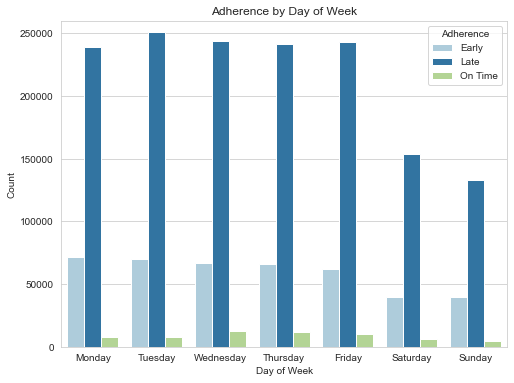

In [28]:
##chart to compare adherence per day

early = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                       'y':[71324, 70162, 66838, 65762, 61969, 39433, 39666]})
late = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                         'y':[239369, 251037, 243731, 241403, 243201, 153800, 132869]})
ontime = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                          'y':[8118, 7960, 12465, 12087, 9848, 6157, 4516]})

early['Adherence']='Early'
late['Adherence']='Late'
ontime['Adherence']='On Time'
res=pd.concat([early, late, ontime])
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Adherence', palette='Paired', ax=ax)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.ylim(0, 260000)
plt.title('Adherence by Day of Week')
plt.savefig('adh-by-dow.png')
plt.show()

In [29]:
##create table that looks at 2 hours intervals
##create table for school year and table for out of school year to look at impact on headway dev

In [30]:
##takes too long to run- will run at a later time
##For loop to determine whether the time is rush hour using 'SCHEDULED_TIME' column, create 'RUSH_HOUR' list
RUSH_HOUR = []

for x in hw_clean['SCHEDULED_TIME']:
    if x >= '07:00:00' and x <= '09:30:00':
        RUSH_HOUR.append('Morning Rush')
    elif x >= '16:00:00' and x <= '18:00:00':
        RUSH_HOUR.append('Evening Rush')
    else:
        RUSH_HOUR.append('No Rush')
RUSH_HOUR

['No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'Morning Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rush',
 'No Rus

In [31]:
##convert to df
rush_hour = pd.DataFrame(RUSH_HOUR)
rush_hour.columns = ['RUSH_HOUR']

##add to main df by concat function
hw_clean = pd.concat([hw_clean, rush_hour], axis='columns')
hw_clean.head()

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF,RUSH_HOUR
0,76447164,2021-11-01,Monday,7,297750,TO DOWNTOWN,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,LATE,No Rush
1,76447165,2021-11-01,Monday,7,297750,TO DOWNTOWN,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,LATE,No Rush
2,76447166,2021-11-01,Monday,7,297750,TO DOWNTOWN,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,LATE,No Rush
3,76447167,2021-11-01,Monday,50,297749,TO DOWNTOWN,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,LATE,No Rush
4,76447168,2021-11-01,Monday,50,297749,TO DOWNTOWN,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,EARLY,No Rush


In [32]:
start_date = '2022-06-01' ##define start date
end_date = '2022-08-01' ##define end date

after_start_date = headway["DATE"] >= start_date ##create sub df for all dates >= start date
before_end_date = headway["DATE"] <= end_date ##create sub df for all dates <= end date

between_two_dates = after_start_date & before_end_date ##combine sub dfs into another sub df

df2 = headway.loc[between_two_dates] ##use .loc on main df referencing all the dates within the between sub df
df2

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF
1109085,120220601,1,85713482,2022-06-01,Wednesday,22,2200,1280,311622,0,TO DOWNTOWN,MHSP,14.0,1,36.178360,-86.845441,04:42:00,04:26:03,04:41:02,0.966666,NaN,NaN,NaN,NaN,EARLY
1109086,120220601,1,85713483,2022-06-01,Wednesday,22,2200,1280,311622,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:45:38,04:45:38,0.366666,NaN,NaN,NaN,NaN,EARLY
1109087,120220601,1,85713484,2022-06-01,Wednesday,22,2200,1280,311622,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:53:16,04:53:16,0.733333,NaN,NaN,NaN,NaN,EARLY
1109088,120220601,1,85713485,2022-06-01,Wednesday,22,2200,1280,311622,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,04:59:40,04:59:40,10.333333,NaN,NaN,NaN,NaN,EARLY
1109089,120220601,1,85713486,2022-06-01,Wednesday,22,2200,1280,311641,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,04:59:40,05:17:15,-2.250000,NaN,NaN,NaN,NaN,LATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458067,120220801,1,87136429,2022-08-01,Monday,7,706,1807,319898,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,17:16:00,17:18:19,17:18:19,-2.316666,17.0,19.100000,2.100000,12.352941,LATE
1458068,120220801,1,87136430,2022-08-01,Monday,7,706,1807,319898,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,17:35:00,17:37:15,17:37:15,-2.250000,NaN,NaN,NaN,NaN,LATE
1458069,120220801,1,87136431,2022-08-01,Monday,7,706,1807,319896,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,17:45:00,17:37:15,17:46:53,-1.883333,15.0,16.116666,1.116666,7.444440,LATE
1458070,120220801,1,87136432,2022-08-01,Monday,7,706,1807,319896,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,18:01:00,18:05:09,18:05:09,-4.150000,14.0,18.800000,4.800000,34.285714,LATE


In [33]:
avg_adh_day = hw_clean.groupby(['WEEKDAY']).agg({'ADHERENCE':['mean']})
avg_adh_day

,ADHERENCE
,mean
WEEKDAY,
Friday,-2.602937
Monday,-1.854990
Saturday,-2.727798
Sunday,-1.709351
Thursday,-2.306479
Tuesday,-2.026871
Wednesday,-2.129515


In [34]:
hw_clean.groupby(['RUSH_HOUR']).agg({'ADHERENCE':['mean']})

,ADHERENCE
,mean
RUSH_HOUR,
Evening Rush,-3.461020
Morning Rush,-1.920700
No Rush,-2.025437


In [35]:
##convert each day phase into its own dataframe

morning = hw_clean.loc[hw_clean['RUSH_HOUR']=='Morning Rush']
evening = hw_clean.loc[hw_clean['RUSH_HOUR']=='Evening Rush']
no_rush = hw_clean.loc[hw_clean['RUSH_HOUR']=='No Rush']

print('morning')
print((morning['ON_TIME_PERF'].value_counts()/len(hw_clean))*100 )
print('')
print('evening')
print((evening['ON_TIME_PERF'].value_counts()/len(hw_clean))*100)
print('')
print('no rush')
print((no_rush['ON_TIME_PERF'].value_counts()/len(hw_clean))*100)
print('')


morning
LATE       11.731051
EARLY       3.409723
ON TIME     0.497599
Name: ON_TIME_PERF, dtype: float64

evening
LATE       10.291944
EARLY       2.187953
ON TIME     0.384314
Name: ON_TIME_PERF, dtype: float64

no rush
LATE       53.942015
EARLY      15.351552
ON TIME     2.203849
Name: ON_TIME_PERF, dtype: float64



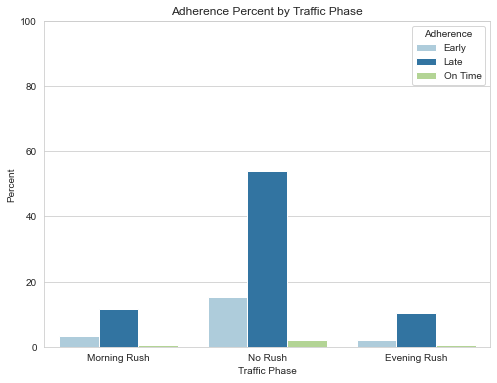

In [36]:
##chart to compare adherence per day

early = pd.DataFrame({'x':['Morning Rush', 'No Rush', 'Evening Rush'],
                       'y':[3.4, 15.4, 2.2]})
late = pd.DataFrame({'x':['Morning Rush', 'No Rush', 'Evening Rush'],
                         'y':[11.7, 53.9, 10.3]})
ontime = pd.DataFrame({'x':['Morning Rush', 'No Rush', 'Evening Rush'],
                          'y':[.49, 2.2, .4]})

early['Adherence']='Early'
late['Adherence']='Late'
ontime['Adherence']='On Time'
res=pd.concat([early, late, ontime])
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x',y='y',data=res,hue='Adherence', palette='Paired', ax=ax)
plt.xlabel('Traffic Phase')
plt.ylabel('Percent')
plt.ylim(0, 100)
plt.title('Adherence Percent by Traffic Phase')
#plt.savefig('adh-by-dow.png')
plt.show()

In [37]:
hw_clean

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF,RUSH_HOUR
0,76447164,2021-11-01,Monday,7,297750,TO DOWNTOWN,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,LATE,No Rush
1,76447165,2021-11-01,Monday,7,297750,TO DOWNTOWN,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,LATE,No Rush
2,76447166,2021-11-01,Monday,7,297750,TO DOWNTOWN,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,LATE,No Rush
3,76447167,2021-11-01,Monday,50,297749,TO DOWNTOWN,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,LATE,No Rush
4,76447168,2021-11-01,Monday,50,297749,TO DOWNTOWN,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,EARLY,No Rush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,91057724,2022-11-01,Tuesday,50,329980,TO DOWNTOWN,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN,LATE,No Rush
1981711,91057851,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670,EARLY,No Rush
1981712,91057852,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN,EARLY,No Rush
1981713,91057881,2022-11-01,Tuesday,56,330011,TO DOWNTOWN,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN,EARLY,No Rush


In [38]:
TIME_OF_DAY = []
for x in hw_clean['SCHEDULED_TIME']:
    if x >= '04:00:00' and x <= '06:00:00':
        TIME_OF_DAY.append('04:00 - 06:00')
    elif x > '06:00:00' and x <= '08:00:00':
        TIME_OF_DAY.append('06:00 - 08:00')
    elif x > '08:00:00' and x <= '10:00:00':
        TIME_OF_DAY.append('08:00 - 10:00')
    elif x > '10:00:00' and x <= '12:00:00':
        TIME_OF_DAY.append('10:00 - 12:00')
    elif x > '12:00:00' and x <= '14:00:00':
        TIME_OF_DAY.append('12:00 - 14:00')
    elif x > '14:00:00' and x <= '16:00:00':
        TIME_OF_DAY.append('14:00 - 16:00')
    elif x > '16:00:00' and x <= '18:00:00':
        TIME_OF_DAY.append('16:00 - 18:00')
    elif x > '18:00:00' and x <= '20:00:00':
        TIME_OF_DAY.append('18:00 - 20:00')
    elif x > '20:00:00' and x <= '22:00:00':
        TIME_OF_DAY.append('20:00 - 22:00')
    elif x > '22:00:00' and x <= '24:00:00':
        TIME_OF_DAY.append('22:00 - 24:00')
    else:
        TIME_OF_DAY.append('25:00+')
TIME_OF_DAY

['14:00 - 16:00',
 '14:00 - 16:00',
 '14:00 - 16:00',
 '14:00 - 16:00',
 '14:00 - 16:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '04:00 - 06:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '06:00 - 08:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '08:00 - 10:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '10:00 - 12:00',
 '12:00 - 14:00',
 '12:00 - 14:00',
 '12:00 - 

In [39]:
##convert to df
time_of_day = pd.DataFrame(TIME_OF_DAY)
time_of_day.columns = ['TIME_OF_DAY']

##add to main df by concat function
hw_clean = pd.concat([hw_clean, time_of_day], axis='columns')
hw_clean

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF,RUSH_HOUR,TIME_OF_DAY
0,76447164,2021-11-01,Monday,7,297750,TO DOWNTOWN,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,LATE,No Rush,14:00 - 16:00
1,76447165,2021-11-01,Monday,7,297750,TO DOWNTOWN,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,LATE,No Rush,14:00 - 16:00
2,76447166,2021-11-01,Monday,7,297750,TO DOWNTOWN,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,NaN,LATE,No Rush,14:00 - 16:00
3,76447167,2021-11-01,Monday,50,297749,TO DOWNTOWN,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,NaN,LATE,No Rush,14:00 - 16:00
4,76447168,2021-11-01,Monday,50,297749,TO DOWNTOWN,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,NaN,EARLY,No Rush,14:00 - 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,91057724,2022-11-01,Tuesday,50,329980,TO DOWNTOWN,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,NaN,LATE,No Rush,14:00 - 16:00
1981711,91057851,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,-23.666670,EARLY,No Rush,14:00 - 16:00
1981712,91057852,2022-11-01,Tuesday,50,330003,TO DOWNTOWN,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,NaN,EARLY,No Rush,14:00 - 16:00
1981713,91057881,2022-11-01,Tuesday,56,330011,TO DOWNTOWN,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,NaN,EARLY,No Rush,14:00 - 16:00


In [40]:
tod_chart = hw_clean.groupby('TIME_OF_DAY', as_index=False)['ADHERENCE'].mean()
dow_chart = hw_clean.groupby('WEEKDAY', as_index=False)['ADHERENCE'].mean()

print(tod_chart)
print(dow_chart)

      TIME_OF_DAY  ADHERENCE
0   04:00 - 06:00  -0.950723
1   06:00 - 08:00  -1.548472
2   08:00 - 10:00  -1.816968
3   10:00 - 12:00  -1.643739
4   12:00 - 14:00  -1.975696
5   14:00 - 16:00  -2.586822
6   16:00 - 18:00  -3.461020
7   18:00 - 20:00  -2.897905
8   20:00 - 22:00  -2.164473
9   22:00 - 24:00  -2.051981
10         25:00+  -1.420669
     WEEKDAY  ADHERENCE
0     Friday  -2.602937
1     Monday  -1.854990
2   Saturday  -2.727798
3     Sunday  -1.709351
4   Thursday  -2.306479
5    Tuesday  -2.026871
6  Wednesday  -2.129515


In [41]:
SORT = [5, 1, 6, 7, 4, 2, 3]
dow_chart['SORT'] = SORT
dow_chart = dow_chart.sort_values(by=['SORT'] )
dow_chart

,WEEKDAY,ADHERENCE,SORT
1,Monday,-1.854990,1
5,Tuesday,-2.026871,2
6,Wednesday,-2.129515,3
4,Thursday,-2.306479,4
0,Friday,-2.602937,5
2,Saturday,-2.727798,6
3,Sunday,-1.709351,7


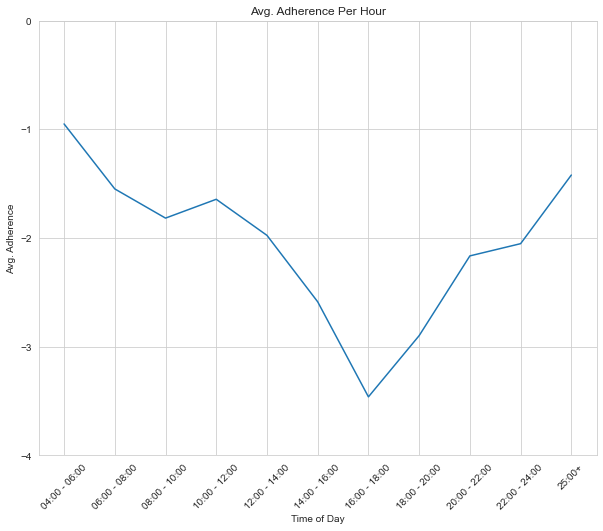

In [42]:
x = tod_chart['TIME_OF_DAY']
y = tod_chart['ADHERENCE']
yticks = np.arange(-4, 1, 1) ##sets y ticks. parameters = (start, stop, step)

plt.figure(figsize=(10,8))
#plt.grid(axis='y')
plt.xlabel('Time of Day')
plt.ylabel('Avg. Adherence')
plt.title('Avg. Adherence Per Hour')
plt.ylim(-4, 0)
plt.yticks(yticks)
plt.plot(x,y)
plt.xticks(rotation = 45)
plt.savefig('avg_adherence_per_hour.png')
plt.show()


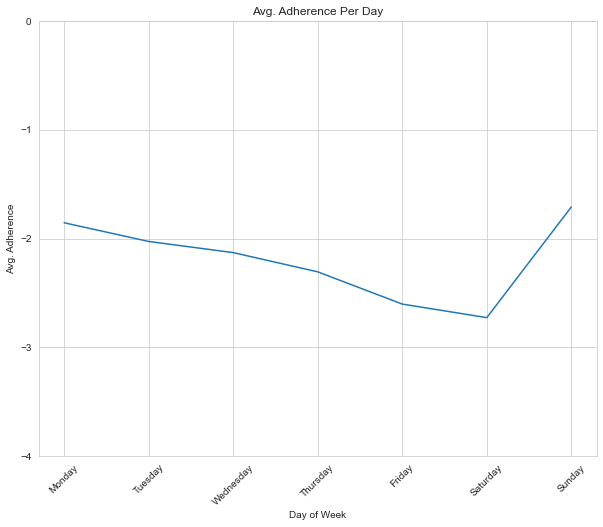

In [43]:
x = dow_chart['WEEKDAY']
y = dow_chart['ADHERENCE']
yticks = np.arange(-4, 1, 1) ##sets y ticks. parameters = (start, stop, step)

plt.figure(figsize=(10,8))
#plt.grid(axis='y')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Adherence')
plt.title('Avg. Adherence Per Day')
plt.ylim(-4, 0)
plt.yticks(yticks)
plt.plot(x,y)
plt.xticks(rotation = 45)
plt.savefig('avg_adherence_per_day.png')
plt.show()


In [44]:
hw_clean.sort_values(by=['DATE','SCHEDULED_TIME'] )

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF,RUSH_HOUR,TIME_OF_DAY
738,76448720,2021-11-01,Monday,23,298524,FROM DOWNTOWN,4.0,1,36.244060,-86.757403,04:20:00,04:18:16,04:24:12,-4.200000,NaN,NaN,NaN,NaN,LATE,No Rush,04:00 - 06:00
3320,76452743,2021-11-01,Monday,55,300293,TO DOWNTOWN,10.0,1,36.052637,-86.654878,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN,NaN,LATE,No Rush,04:00 - 06:00
739,76448721,2021-11-01,Monday,23,298524,FROM DOWNTOWN,7.0,0,36.231512,-86.780490,04:29:00,04:33:00,04:33:00,-4.000000,NaN,NaN,NaN,NaN,LATE,No Rush,04:00 - 06:00
3321,76452744,2021-11-01,Monday,55,300293,TO DOWNTOWN,9.0,0,36.072852,-86.636862,04:29:00,04:29:41,04:29:41,-0.683333,NaN,NaN,NaN,NaN,LATE,No Rush,04:00 - 06:00
4454,76453905,2021-11-01,Monday,56,300675,TO DOWNTOWN,10.0,1,36.300470,-86.695610,04:29:00,04:21:23,04:31:25,-2.416666,NaN,NaN,NaN,NaN,LATE,No Rush,04:00 - 06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981130,91055081,2022-11-01,Tuesday,56,329031,FROM DOWNTOWN,13.0,2,36.300470,-86.695610,24:51:00,24:50:06,24:50:06,0.900000,NaN,NaN,NaN,NaN,EARLY,No Rush,25:00+
1976354,91049102,2022-11-01,Tuesday,23,326486,FROM DOWNTOWN,7.0,2,36.244207,-86.760509,24:54:00,24:54:05,24:57:31,-3.516666,NaN,NaN,NaN,NaN,LATE,No Rush,25:00+
1979388,91053293,2022-11-01,Tuesday,55,328389,FROM DOWNTOWN,11.0,2,36.052637,-86.654878,24:57:00,24:54:55,24:56:42,0.300000,NaN,NaN,NaN,NaN,EARLY,No Rush,25:00+
1978565,91052445,2022-11-01,Tuesday,52,328088,FROM DOWNTOWN,9.0,0,36.083421,-86.703471,25:02:00,25:01:14,25:01:14,0.766666,30.0,28.066666,-1.933334,-6.444447,EARLY,No Rush,25:00+


In [45]:
hw_nonulls = hw_clean.dropna()

In [46]:
hw_nonulls

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF,RUSH_HOUR,TIME_OF_DAY
0,76447164,2021-11-01,Monday,7,297750,TO DOWNTOWN,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,LATE,No Rush,14:00 - 16:00
1,76447165,2021-11-01,Monday,7,297750,TO DOWNTOWN,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,LATE,No Rush,14:00 - 16:00
12,76447976,2021-11-01,Monday,22,298128,TO DOWNTOWN,15.0,1,36.178360,-86.845441,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667,-1.047620,LATE,No Rush,04:00 - 06:00
13,76447977,2021-11-01,Monday,22,298128,TO DOWNTOWN,11.0,0,36.193454,-86.839981,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666,2.476189,LATE,No Rush,04:00 - 06:00
14,76447978,2021-11-01,Monday,22,298128,TO DOWNTOWN,6.0,0,36.182177,-86.814445,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667,-6.777780,LATE,No Rush,04:00 - 06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981695,91056031,2022-11-01,Tuesday,7,329461,TO DOWNTOWN,5.0,1,36.107575,-86.812719,17:07:00,17:08:19,17:08:19,-1.316666,18.0,16.850000,-1.150000,-6.388889,LATE,Evening Rush,16:00 - 18:00
1981696,91056032,2022-11-01,Tuesday,7,329461,TO DOWNTOWN,4.0,0,36.138372,-86.800622,17:16:00,17:22:47,17:22:47,-6.783333,17.0,14.500000,-2.500000,-14.705882,LATE,Evening Rush,16:00 - 18:00
1981698,91056034,2022-11-01,Tuesday,7,329459,FROM DOWNTOWN,3.0,1,36.167091,-86.781923,17:45:00,17:46:10,17:46:10,-1.166666,15.0,13.116666,-1.883334,-12.555560,LATE,Evening Rush,16:00 - 18:00
1981699,91056035,2022-11-01,Tuesday,7,329459,FROM DOWNTOWN,4.0,0,36.138881,-86.800622,18:01:00,18:05:13,18:05:13,-4.216666,14.0,7.483333,-6.516667,-46.547621,LATE,No Rush,18:00 - 20:00


In [57]:
tod_hw_chart = hw_nonulls.groupby('TIME_OF_DAY', as_index=False)['HEADWAY_DEV_PERC'].mean()
dow_hw_chart = hw_nonulls.groupby('WEEKDAY', as_index=False)['HEADWAY_DEV_PERC'].mean()

In [64]:
monday = hw_nonulls.loc[hw_nonulls['WEEKDAY']=='Monday']
monday

,ADHERENCE_ID,DATE,WEEKDAY,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,HEADWAY_DEV_PERC,ON_TIME_PERF,RUSH_HOUR,TIME_OF_DAY
0,76447164,2021-11-01,Monday,7,297750,TO DOWNTOWN,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,14.166664,LATE,No Rush,14:00 - 16:00
1,76447165,2021-11-01,Monday,7,297750,TO DOWNTOWN,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,23.809521,LATE,No Rush,14:00 - 16:00
12,76447976,2021-11-01,Monday,22,298128,TO DOWNTOWN,15.0,1,36.178360,-86.845441,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667,-1.047620,LATE,No Rush,04:00 - 06:00
13,76447977,2021-11-01,Monday,22,298128,TO DOWNTOWN,11.0,0,36.193454,-86.839981,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666,2.476189,LATE,No Rush,04:00 - 06:00
14,76447978,2021-11-01,Monday,22,298128,TO DOWNTOWN,6.0,0,36.182177,-86.814445,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667,-6.777780,LATE,No Rush,04:00 - 06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975196,91067116,2022-10-31,Monday,7,329461,TO DOWNTOWN,4.0,0,36.138372,-86.800622,17:16:00,17:24:45,17:24:45,-8.750000,17.0,26.133333,9.133333,53.725488,LATE,Evening Rush,16:00 - 18:00
1975198,91067118,2022-10-31,Monday,7,329459,FROM DOWNTOWN,3.0,1,36.167091,-86.781923,17:45:00,17:42:06,17:46:07,-1.116666,15.0,15.216666,0.216666,1.444440,LATE,Evening Rush,16:00 - 18:00
1975199,91067119,2022-10-31,Monday,7,329459,FROM DOWNTOWN,4.0,0,36.138881,-86.800622,18:01:00,18:02:01,18:02:01,-1.016666,14.0,13.033333,-0.966667,-6.904764,LATE,No Rush,18:00 - 20:00
1975213,91068928,2022-10-31,Monday,50,330003,TO DOWNTOWN,10.0,1,36.161008,-86.800851,15:20:00,14:57:47,15:06:41,13.316666,10.0,5.100000,-4.900000,-49.000000,EARLY,No Rush,14:00 - 16:00


In [75]:
np.isinf(hw_nonulls)

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [62]:
dow_hw_chart

,WEEKDAY,HEADWAY_DEV_PERC
0,Friday,NaN
1,Monday,NaN
2,Saturday,2.197760
3,Sunday,1.712151
4,Thursday,NaN
5,Tuesday,NaN
6,Wednesday,NaN


In [59]:
tod_hw_chart

,TIME_OF_DAY,HEADWAY_DEV_PERC
0,04:00 - 06:00,2.170825
1,06:00 - 08:00,2.533217
2,08:00 - 10:00,1.559529
3,10:00 - 12:00,NaN
4,12:00 - 14:00,1.938463
5,14:00 - 16:00,NaN
6,16:00 - 18:00,2.019670
7,18:00 - 20:00,1.018063
8,20:00 - 22:00,1.381478
9,22:00 - 24:00,1.755333


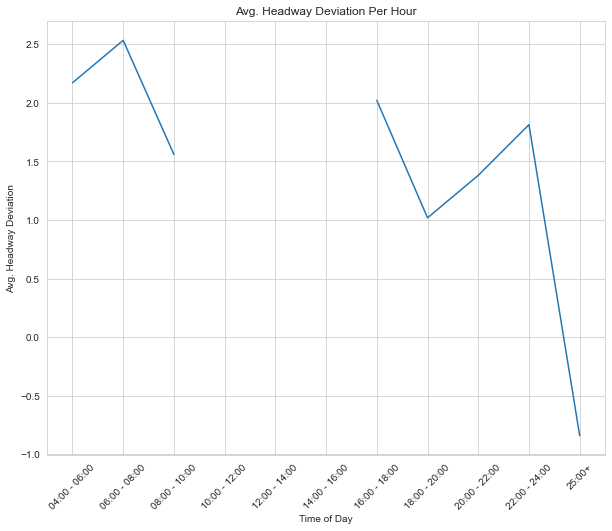

In [49]:
x = tod_hw_chart['TIME_OF_DAY']
y = tod_hw_chart['HEADWAY_DEV_PERC']
##yticks = np.arange(-4, 1, 1) ##sets y ticks. parameters = (start, stop, step)

plt.figure(figsize=(10,8))
#plt.grid(axis='y')
plt.xlabel('Time of Day')
plt.ylabel('Avg. Headway Deviation')
plt.title('Avg. Headway Deviation Per Hour')
##plt.ylim(-4, 0)
##plt.yticks(yticks)
plt.plot(x,y)
plt.xticks(rotation = 45)
##plt.savefig('avg_adherence_per_hour.png')
plt.show()